# SVM

In [1]:
#電腦規格與價位分析

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
import os

print(os.listdir("./"))

['.ipynb_checkpoints', 'svm_svr.ipynb', 'test.csv', 'train.csv']


In [3]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [7]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

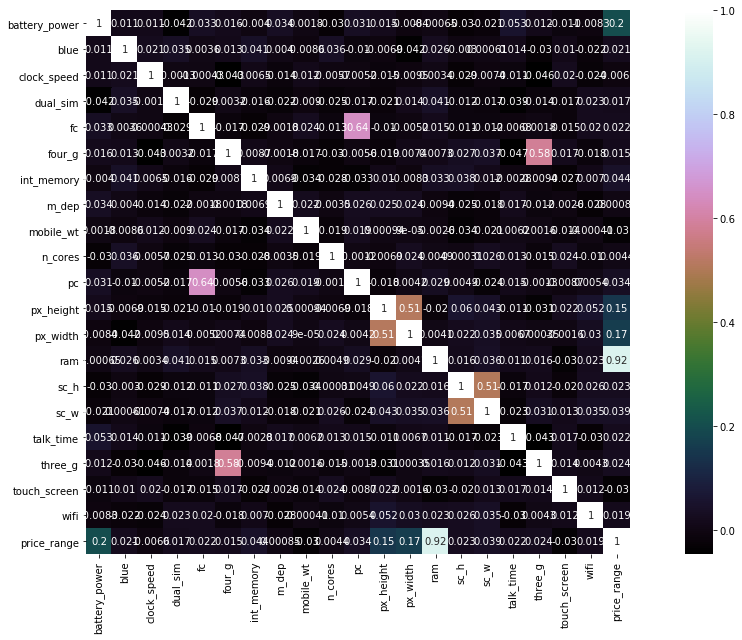

In [8]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

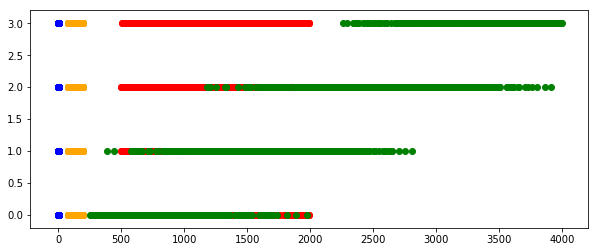

In [8]:
#針對price_range，觀察相對應欄位
#電池續航力與價錢有明顯正相關


f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')

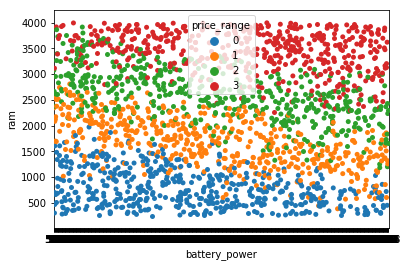

In [9]:
sns.swarmplot(x='battery_power',y='ram',data=df,hue='price_range')
plt.show()

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


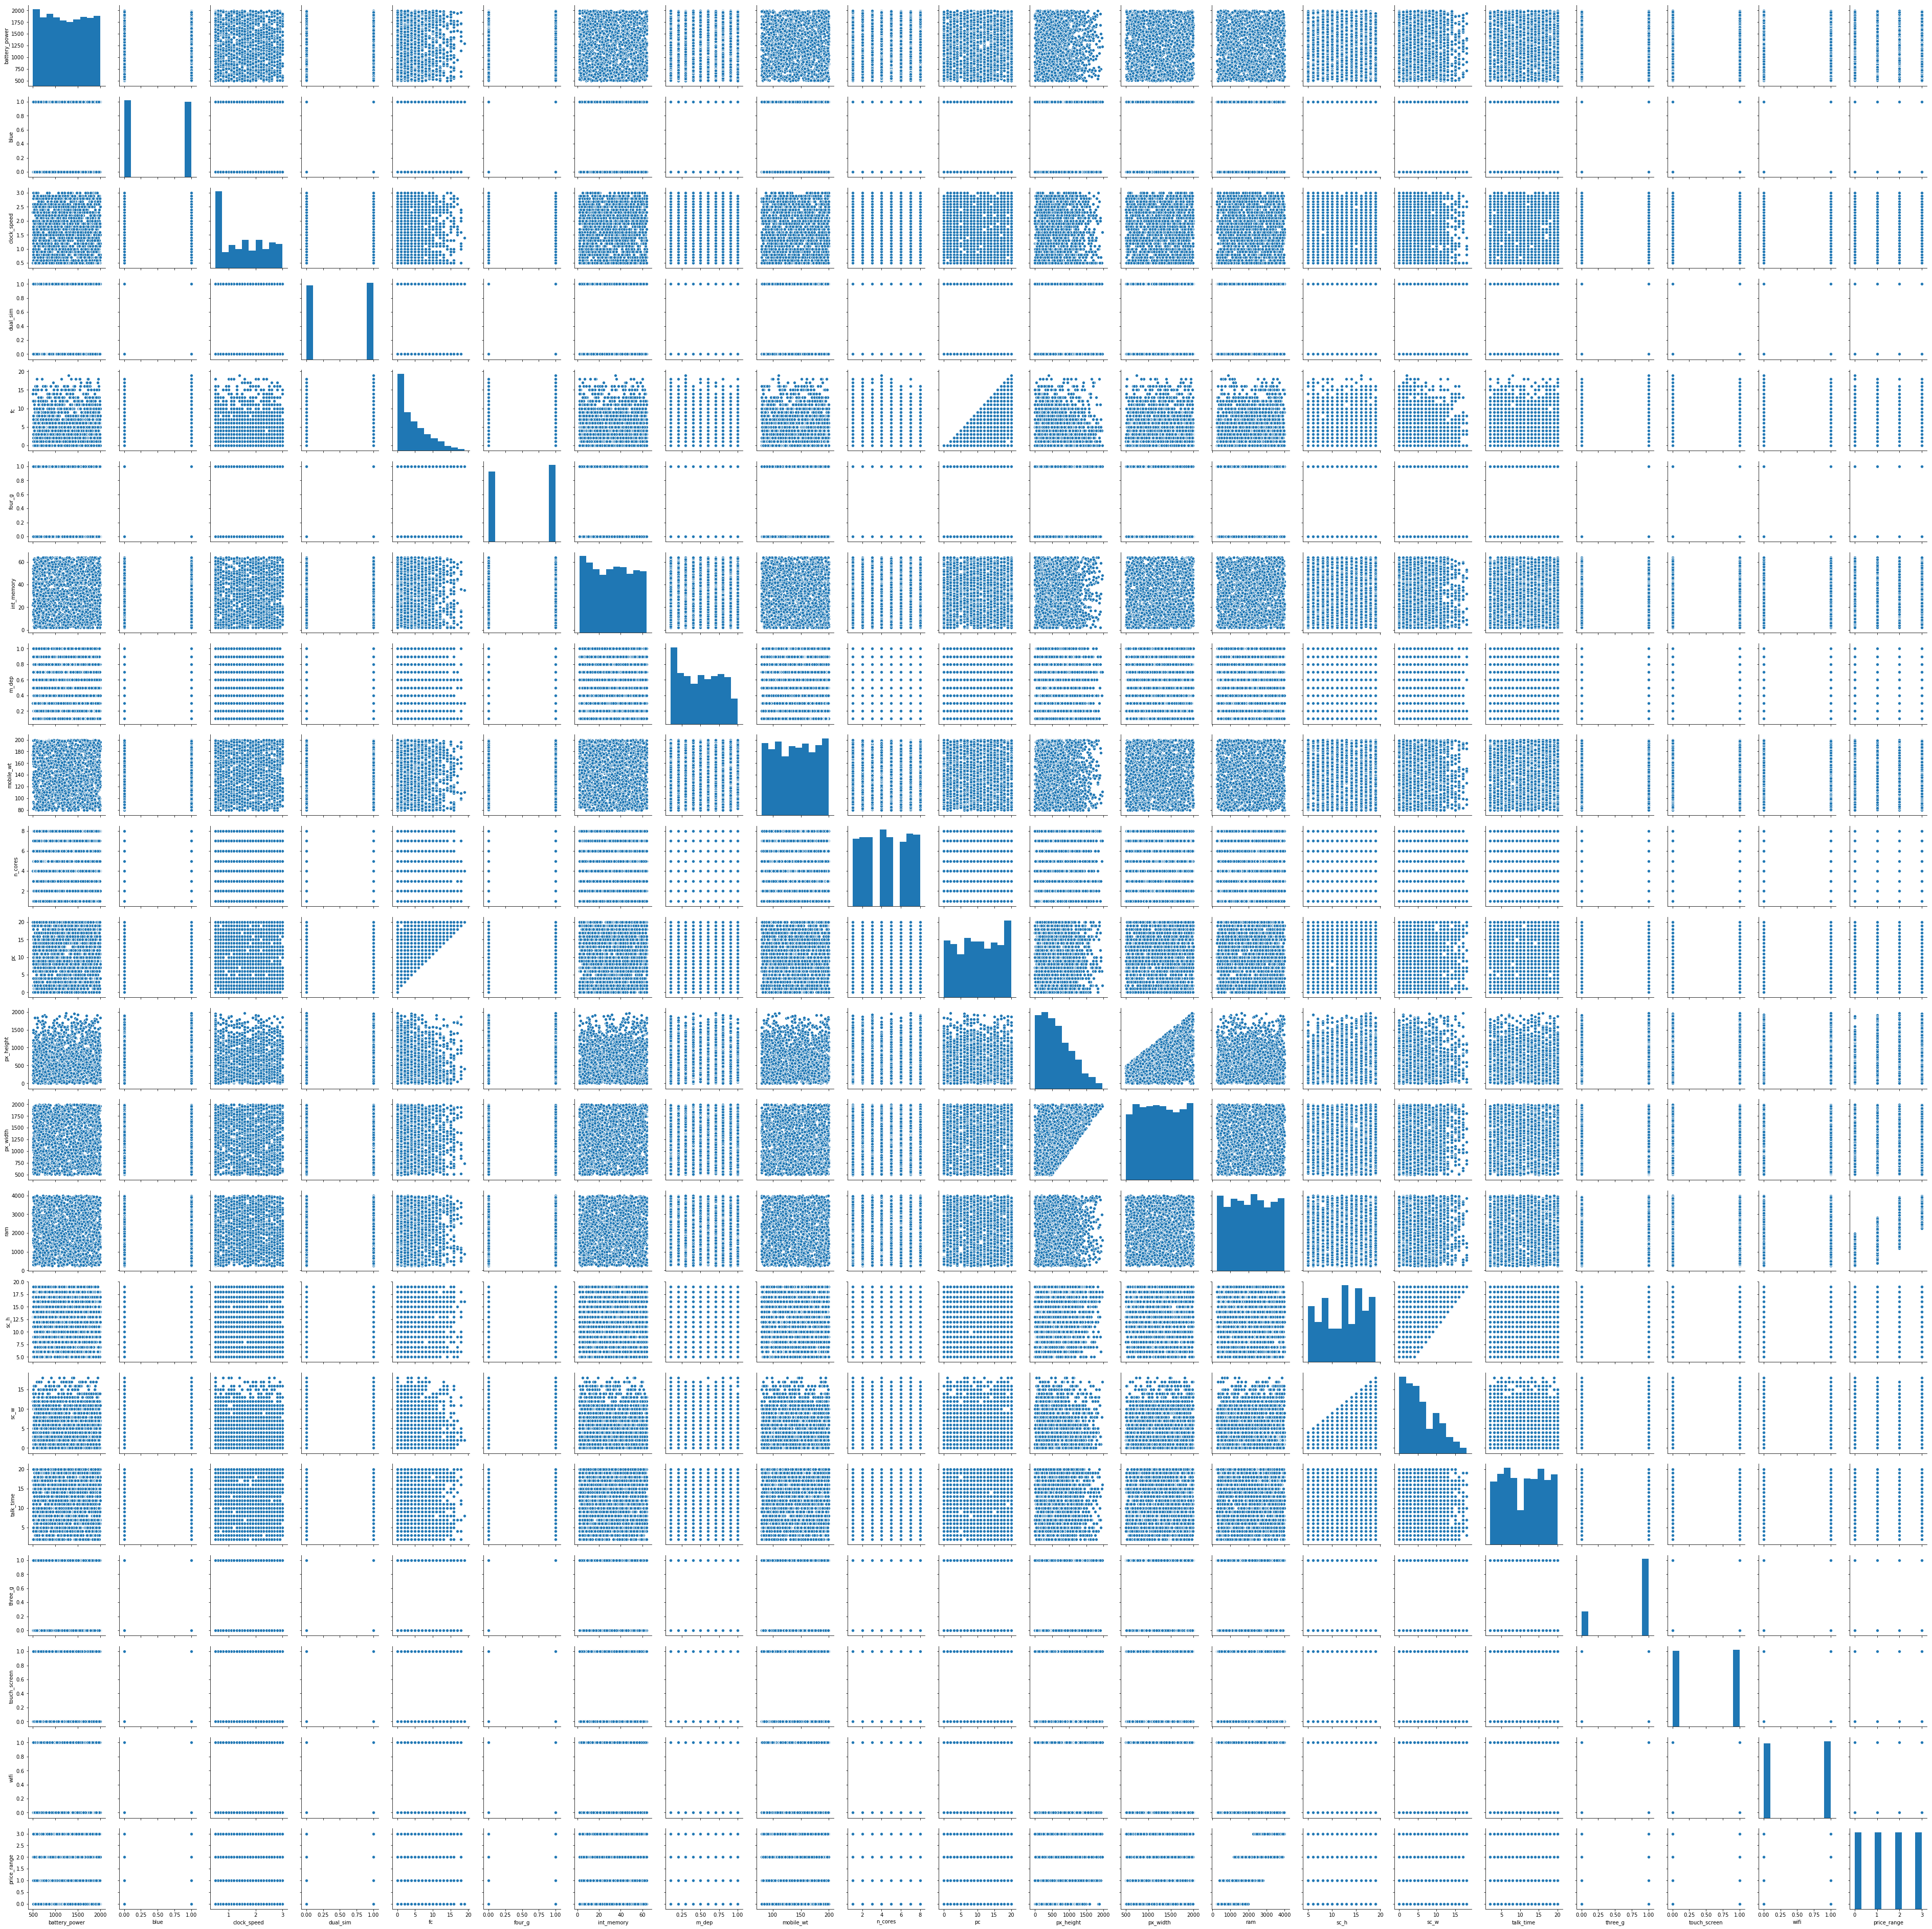

In [17]:
sns.pairplot(df,size=2.5)
plt.show()

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t=np.array(df['price_range'])
X_t=df
X_t=X_t.drop(['price_range'],axis=1)


In [11]:
#轉成ndarray格式，以利標準化
X_t=np.array(X_t)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_t=scaler.fit_transform(X_t)

In [13]:
#將X_t與y_t進行切分
X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,test_size=0.2,random_state=42)

In [14]:
#檢查
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(y_train.shape))
print("shape of Y Test :"+str(y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [15]:
#懲罰參數C: 
#C越大針對於分類錯誤的懲罰增大，準確率就會高，但是泛化程度就低
#C越小針對於分類錯誤的懲罰就低，允許錯誤的資料，將他們當作noise，泛化能力強

#kernal: 可以是 linear, poly, rbf, sigmoid, precomputed

for _ in [1,3,5,10,40,60,80,100]:
    clf=SVC(kernel='linear',C=_).fit(X_train,y_train)
    score_train=clf.score(X_train,y_train)
    score_test=clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score:{:2f}, test score:{:2f}\n".format(_,score_train,score_test))

Linear SVM value of C:1, training score:0.953750, test score:0.960000

Linear SVM value of C:3, training score:0.961875, test score:0.977500

Linear SVM value of C:5, training score:0.968125, test score:0.975000

Linear SVM value of C:10, training score:0.977500, test score:0.967500

Linear SVM value of C:40, training score:0.981250, test score:0.962500

Linear SVM value of C:60, training score:0.981250, test score:0.962500

Linear SVM value of C:80, training score:0.981875, test score:0.970000

Linear SVM value of C:100, training score:0.980625, test score:0.967500



In [16]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut

clf1=SVC(kernel='linear',C=5).fit(X_train,y_train)
scores=cross_val_score(clf1,X_train,y_train,cv=5)
#K-Fold
strat_scores=cross_val_score(clf1,X_train,y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#LOO
Loo=LeaveOneOut()
Loo_scores=cross_val_score(clf1,X_train,y_train,cv=Loo)

print("The Cross Validation Score:", str(scores))
print("The Average Cross Validation Score:", str(scores.mean()))
print("The stratified Cross Validation Score:", str(strat_scores))
print("The Average stratified Cross Validation Score:", str(strat_scores.mean()))
print("The LeaveOneOut Cross Validation Score:", str(Loo_scores))
print("The Average LeaveOneOut Cross Validation Score:", str(Loo_scores.mean()))


The Cross Validation Score: [0.95015576 0.9470405  0.91277259 0.92789969 0.95283019]
The Average Cross Validation Score: 0.9381397445103292
The stratified Cross Validation Score: [0.93457944 0.95327103 0.9376947  0.97178683 0.93081761]
The Average stratified Cross Validation Score: 0.9456299230516512
The LeaveOneOut Cross Validation Score: [1. 0. 0. ... 1. 1. 1.]
The Average LeaveOneOut Cross Validation Score: 0.946875


In [41]:
#DummyClassifier完全忽略輸入資料，自行找出符合設定的測試資料，看看整體資料狀況
#most_frequent: 預測值是出現頻率最高的類別
#stratified : 預測值是根據訓練資料集資料分布，給出隨機預測
#prior: 預測值是以優先級別最高者
#uniform: 隨機生成


from sklearn.dummy import DummyClassifier

for strat in ['stratified','most_frequent','prior','uniform']:
    dummy_maj=DummyClassifier(strategy=strat).fit(X_train,y_train)
    
    print("Train Strategy: {}\n Score: {:.2f}".format(strat,dummy_maj.score(X_train,y_train)))
    print("Test Strategy: {}\n Score: {:.2f}".format(strat,dummy_maj.score(X_test,y_test)))

Train Strategy: stratified
 Score: 0.25
Test Strategy: stratified
 Score: 0.23
Train Strategy: most_frequent
 Score: 0.26
Test Strategy: most_frequent
 Score: 0.23
Train Strategy: prior
 Score: 0.26
Test Strategy: prior
 Score: 0.23
Train Strategy: uniform
 Score: 0.25
Test Strategy: uniform
 Score: 0.23


In [17]:
#為了要畫圖，挑出資料來，做一些轉換
#battery_power與ram
X=np.array(df.iloc[:,[0,13]])
y=np.array(df['price_range'])
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


In [18]:
X = scaler.fit_transform(X)

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


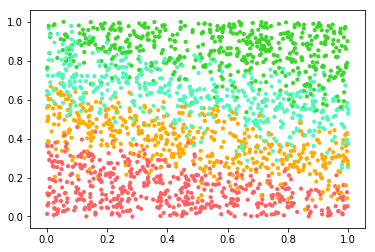

In [21]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

#四種顏色，表示四個price_range
#x軸: battery_power
#y軸: ram
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10)
plt.show()

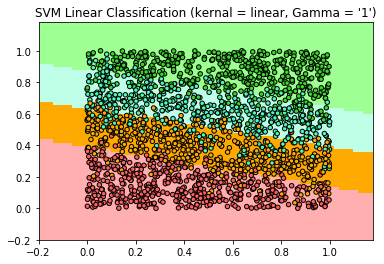

In [22]:
#四種price_range為底圖
#針對battery_power與ram

h=0.02
c_param=1

for weights in ['SVM']:
    clf1=SVC(kernel='linear',C=c_param)
    clf1.fit(X,y)
    
    x_min,x_max=X[:,0].min()-0.2,X[:,0].max()+0.2
    y_min,y_max=X[:,1].min()-0.2,X[:,1].max()+0.2
    
    #meshgrid: 將資料轉為座標點
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    
    #ravel與flatten功能是一樣的，都是多維資料轉為一維資料
    #ravel將資料轉為一維之後，再進行concat
    Z=clf1.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #整理對應
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()                         

In [23]:
print("The score of  the value:", str(clf1.score(X,y)))

The score of  the value: 0.825


In [24]:
#LinSVC比使用SVC(kernel="linear")還好

from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2=LinearSVC(C=this_C).fit(X_train,y_train)
    score_train=clf2.score(X_train,y_train)
    score_test=clf2.score(X_test,y_test)
    print("Linear SVM value of C{}, training score: {:2f}, test score: {:2f}\n".format(this_C, score_train,score_test))

Linear SVM value of C1, training score: 0.846250, test score: 0.840000



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C3, training score: 0.864375, test score: 0.855000



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C5, training score: 0.867500, test score: 0.870000



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C10, training score: 0.875625, test score: 0.880000



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C40, training score: 0.826250, test score: 0.827500



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C60, training score: 0.816875, test score: 0.800000



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C80, training score: 0.742500, test score: 0.747500

Linear SVM value of C100, training score: 0.780625, test score: 0.797500



C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# SVR

In [25]:
from sklearn.svm import SVR

In [26]:
#距離誤差

svr=SVR(kernel='linear',C=1,epsilon=0.01).fit(X_train,y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,y_train)))

0.92 is the accuracy of the SV Regressor


In [27]:
for this_C in [1,5,10,25,50,100]:
    clf3=SVC(kernel='rbf',C=this_C).fit(X_train,y_train)
    clf3_train=clf3.score(X_train,y_train)
    clf3_test=clf3.score(X_test,y_test)
    print("SVM for Non Linear\n C:{}, training score: {:.2f}, test score: {:.2f}".format(this_C,clf3_train,clf3_test))

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM for Non Linear
 C:1, training score: 0.90, test score: 0.89
SVM for Non Linear
 C:5, training score: 0.96, test score: 0.93

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



SVM for Non Linear
 C:10, training score: 0.96, test score: 0.93


C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM for Non Linear
 C:25, training score: 0.98, test score: 0.93
SVM for Non Linear
 C:50, training score: 0.99, test score: 0.93


C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM for Non Linear
 C:100, training score: 0.99, test score: 0.92


C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


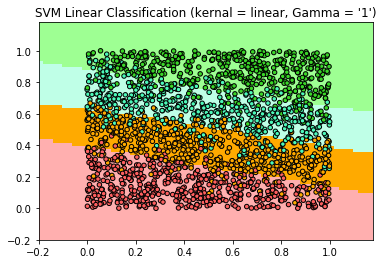

In [28]:
#四種price_range為底圖
#針對battery_power與ram
#使用rbf(解決非線性資料)

h=0.02
c_param=1

for weights in ['SVM']:
    clf1=SVC(kernel='rbf',C=c_param)
    clf1.fit(X,y)
    
    x_min,x_max=X[:,0].min()-0.2,X[:,0].max()+0.2
    y_min,y_max=X[:,1].min()-0.2,X[:,1].max()+0.2
    
    #meshgrid: 將資料轉為座標點
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    
    #ravel與flatten功能是一樣的，都是多維資料轉為一維資料
    #ravel將資料轉為一維之後，再進行concat
    Z=clf1.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #整理對應
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (c_param))

plt.show() 

In [29]:
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3=SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,y_train)
        clf3_train=clf3.score(X_train,y_train)
        clf3_test=clf3.score(X_test,y_test)
        print("SVM for Non Linear\n Gamma:{} C:{} training score: {:.2f}, test score: {:.2f}".format(this_gamma,this_C,clf3_train,clf3_test))

SVM for Non Linear
 Gamma:0.1 C:1 training score: 0.93, test score: 0.90
SVM for Non Linear
 Gamma:0.1 C:5 training score: 0.96, test score: 0.91
SVM for Non Linear
 Gamma:0.1 C:7 training score: 0.97, test score: 0.91
SVM for Non Linear
 Gamma:0.1 C:10 training score: 0.98, test score: 0.91
SVM for Non Linear
 Gamma:0.1 C:15 training score: 0.99, test score: 0.91
SVM for Non Linear
 Gamma:0.1 C:25 training score: 0.99, test score: 0.92
SVM for Non Linear
 Gamma:0.1 C:50 training score: 1.00, test score: 0.91
SVM for Non Linear
 Gamma:0.5 C:1 training score: 0.98, test score: 0.83
SVM for Non Linear
 Gamma:0.5 C:5 training score: 1.00, test score: 0.85
SVM for Non Linear
 Gamma:0.5 C:7 training score: 1.00, test score: 0.85
SVM for Non Linear
 Gamma:0.5 C:10 training score: 1.00, test score: 0.85
SVM for Non Linear
 Gamma:0.5 C:15 training score: 1.00, test score: 0.85
SVM for Non Linear
 Gamma:0.5 C:25 training score: 1.00, test score: 0.85
SVM for Non Linear
 Gamma:0.5 C:50 training 

In [30]:
#優化
#找出超參數

from sklearn.model_selection import GridSearchCV

param_grid={'C':[1,5,7,10,15,25,50],
           'gamma':[.1,.5,.10,.25,.50,1]}
GS=GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [31]:
GS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 7, 10, 15, 25, 50], 'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print("the parameters {} are the best".format(GS.best_params_))
print("the best score is {:.2f}".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best
the best score is 0.91


In [33]:
#degress: 多項式poly的維度，預設為3
#結果發現poly比rbf還好

svr2=SVR(degree=2,C=100,epsilon=.01).fit(X_train,y_train)
print("{:2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,y_train)))

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.950980 is the accuracy of the SV Regressor


In [34]:
#預測
test.drop(['id'],axis=1,inplace=True)
test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In [35]:
test_mat=np.array(test)
test=scaler.fit_transform(test_mat)

In [60]:
clf4=SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,y_train)
pred=clf4.predict(test_mat)
pred=pd.DataFrame(pred)
pred.head()

0
0  2
1  2
2  2
3  2
4  2

In [62]:
pred=svr2.predict(test_mat)
pred=pd.DataFrame(pred)